<a href="https://colab.research.google.com/github/RishabhMehra/Image-Processing/blob/main/Understanding_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.chdir('/content/drive/MyDrive/DL/OpenCV')

In [ ]:
from PIL import Image

img= Image.open('princeton_small.jpg')
img.show()

In [ ]:
!ls


c.jpg		     comp_foreground.jpg  dog_image	       scaleinput.jpg
comp_background.jpg  comp_mask.jpg	  princeton_small.jpg


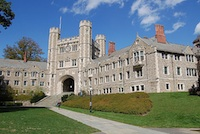

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('princeton_small.jpg')


cv2_imshow(img)

In [ ]:
import numpy as np

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape


(134, 200, 3)

In [ ]:
black_img = np.zeros((134,200,3),dtype="uint8")

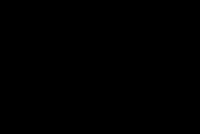

In [ ]:
cv2_imshow(black_img)

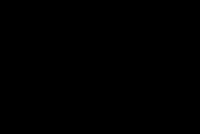

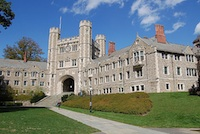

------------------------------------------------------------


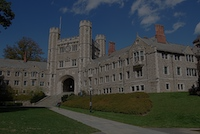

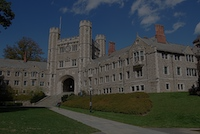

------------------------------------------------------------


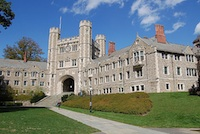

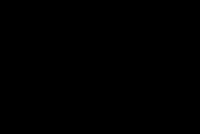

------------------------------------------------------------


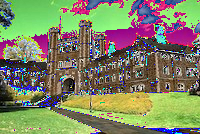

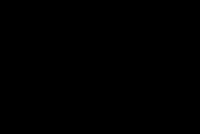

------------------------------------------------------------


In [ ]:
## Testing for Brightness

for a in [0,0.5,1,2]:
  new_img = (1-a)*black_img + a*img
  new_img_2 = (1-a)*img + a*black_img
  cv2_imshow(new_img)
  cv2_imshow(new_img_2)
  print('--'*30)


In [ ]:
white_img = np.ones((134,200,3),dtype="uint8")*256

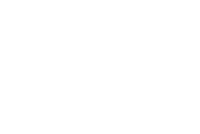

In [ ]:
cv2_imshow(white_img)

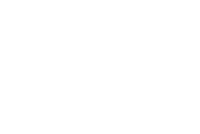

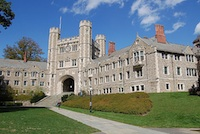

------------------------------------------------------------


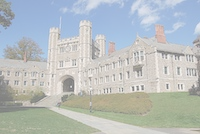

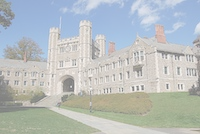

------------------------------------------------------------


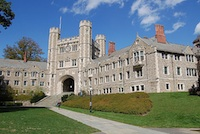

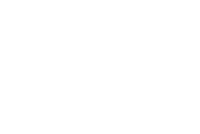

------------------------------------------------------------


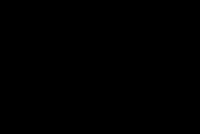

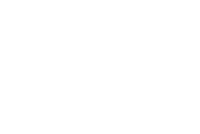

------------------------------------------------------------


In [ ]:
for a in [0,0.5,1,2]:
  new_img = (1-a)*white_img + a*img
  new_img_2 = (1-a)*img + a*white_img
  cv2_imshow(new_img)
  cv2_imshow(new_img_2)
  print('--'*30)

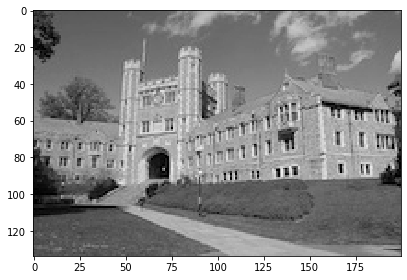

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread,imshow


image = imread('princeton_small.jpg',as_gray=True)
imshow(image)

In [ ]:
print('Shape : ' ,image.shape)
print('Image Array :  ', image)

Shape :  (134, 200)
Image Array :   [[0.19862392 0.20563451 0.16502078 ... 0.38000745 0.47018863 0.49398588]
 [0.26922784 0.19750078 0.25632431 ... 0.48253373 0.5270549  0.46262824]
 [0.19500157 0.16472157 0.21176471 ... 0.45034275 0.46460745 0.40018078]
 ...
 [0.33537608 0.3196898  0.32948235 ... 0.48949647 0.43402902 0.3987349 ]
 [0.28798902 0.31544    0.32998745 ... 0.6500051  0.60294627 0.53235804]
 [0.31677843 0.34030784 0.30893529 ... 0.60212    0.61388471 0.59622627]]


In [ ]:
features = np.reshape(image,(134*200))

In [ ]:
features


array([0.19862392, 0.20563451, 0.16502078, ..., 0.60212   , 0.61388471,
       0.59622627])

In [ ]:
image = imread("dog_image")

image.shape

(195, 258, 3)

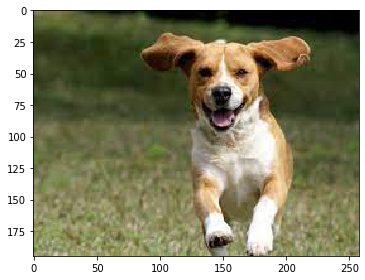

In [ ]:
imshow(image)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


(195, 258)


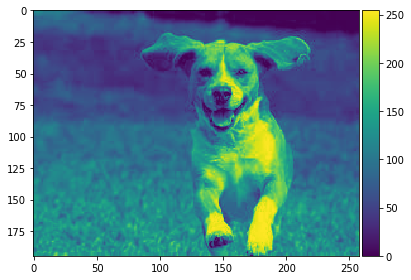

In [ ]:
iimage = np.zeros((195,258))
for i in range(0,image.shape[0]):
  for j in range(0,image.shape[1]):
    iimage[i][j] = (int(image[i,j,0])+int(image[i,j,1])+int(image[i,j,2]))/3



imshow(iimage)

print(iimage.shape)

features = np.reshape(iimage,(195*258))

In [ ]:
image = imread('dog_image',as_gray=True)

In [ ]:
from skimage.filters import prewitt_h,prewitt_v

edges_hor = prewitt_h(image)
edges_ver = prewitt_v(image)

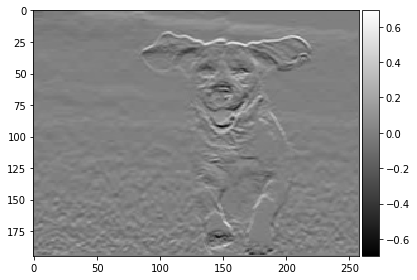

In [ ]:
imshow(edges_hor,cmap='gray')


#print('*'*30)


#imshow(edges_ver)

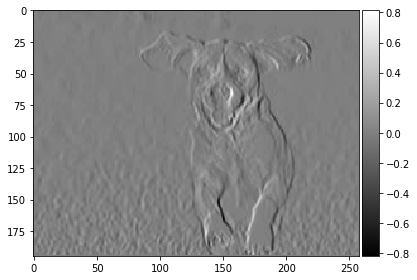

In [ ]:
imshow(edges_ver,cmap='gray')

##HOG Feature Descriptor

There are a number of feature descriptors out there. Here are a few of the most popular ones:

HOG: Histogram of Oriented Gradients
<br>SIFT: Scale Invariant Feature Transform
<br>SURF: Speeded-Up Robust Feature

In [ ]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

(128, 64, 3)


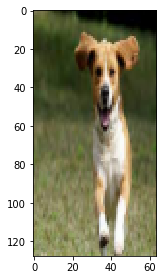

In [ ]:
image = imread('dog_image')

resized_img = resize(image,(128,64))
imshow(resized_img)
print(resized_img.shape)

In [ ]:
fd, hog_image = hog(resized_img,orientations=9,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True,multichannel=True)

In [ ]:
fd.shape

(3780,)

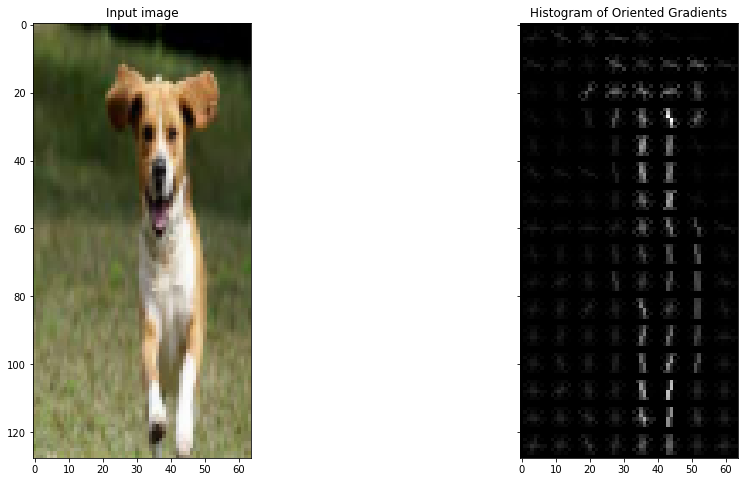

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8),sharex=True,sharey=True)

ax1.imshow(resized_img,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,1))

ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


## SIFT

It is a feature detection algorithm in Computer Vision
